<a href="https://colab.research.google.com/github/harnalashok/Clustering/blob/master/gmm_generateFaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
# Last amended: 24th April, 2021
# My folder:
# Ref: Page 248, Aurelien
# Also see: https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py
# Objectives:
#           i)  Using GMM as a generative model
#           ii) Generate faces 

# https://www.kaggle.com/c/Kannada-MNIST/data?select=train.csv
#
"""

### Generating faces
How gmm acts as a generative model?

A face can be assumed to be nothing but a bundle of many Gaussian clusters oriented as per prominent facial features (see below images):

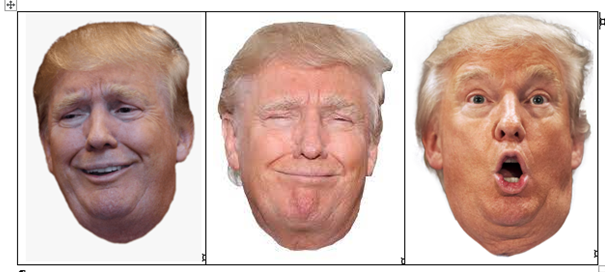



Of course, face is a mixture of not two or three but many gaussian components. So, train a GMM on faces with sufficient number of components--the more the better. For example, in a dense region (low variance) there will be large number of points producing a 'darker colour' region while in a sparse region (high variance) less density of points would give an effect to a lighter colour (shade).   

And also during learning process, allow a large number of iterations. Once distributions have been learnt, then those distributions can be used to generate points-- See below three clusters learnt on a face.    

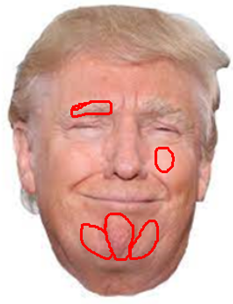

### Call libraries

In [30]:
# 1.0 Call libraries
from sklearn.datasets import fetch_olivetti_faces
# 1.1 Import GaussianMixture class
from sklearn.mixture import GaussianMixture
# 1.2 Data manipulation
import pandas as pd
import numpy as np
# 1.3 Plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
# 1.4
import scipy.io 
import time, os

In [31]:
# 1.5 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Get Olivetti faces
<font size = 1> 400 images; (64 X 64) pixels</font>

Here is a sample of olivetti faces. It is composed of 40 people, a total of 400 faces;
There are 10 face pictures for each person, including front face, side face and different expressions:    


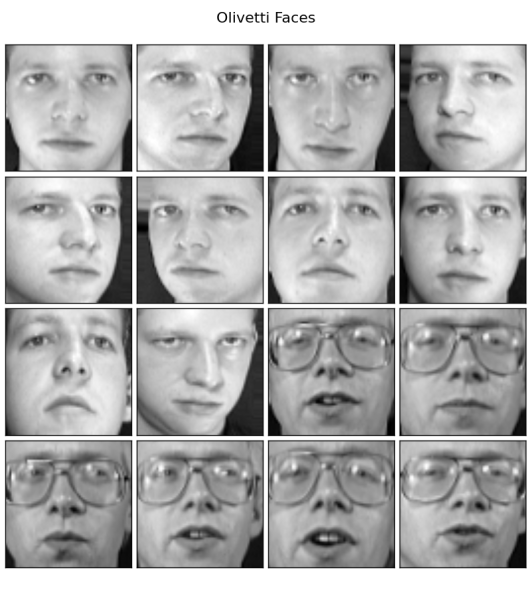

In [ ]:
# 2.0 Get olivetti faces
# Data is downloaded to:
#    /home/ashok/scikit_learn_data
#    /root/scikit_learn_data

_=faces,_ = fetch_olivetti_faces(
                                 return_X_y=True,
                                 shuffle=True
                                 )
# 2.1
faces.shape    # (400, 4096) 400 faces


# 2.2 Look at just one face:

_=imshow(faces[0, :].reshape(64,64))

In [ ]:
# 3.0 You can also get the faces from a dataset
#     in matlab format.
#     Download it from here:
#     https://cs.nyu.edu/~roweis/data/olivettifaces.mat
#     # https://stackoverflow.com/a/874488/3282777
#     And read it as below:
#
#path = "/content"
#os.chdir(path)
#olivetti = scipy.io.loadmat('olivettifaces.mat')
#olivetti = olivetti['faces'].T
#olivetti.shape
#imshow(olivetti[0].reshape(64,64));

### Gaussian Mixture Modeling (gmm)

#### Instantiate model

In [44]:
# 4.0
gm_faces = GaussianMixture(
                           n_components = 3,   # More the components, better it will be
                                               # but would take more time
                           n_init = 10,
                           max_iter = 100, # The number of EM iterations to perform.
                           verbose = 1,
                           verbose_interval = 5 # No of iter done before next print.
                         )



In [ ]:
# 4.1   Train the model of the dataset:

start = time.time()
gm_faces.fit(faces)
end = time.time()
(end - start)/60     # 6 minutes

In [ ]:
# 4.2 Did algorithm(s) converge?
gm_faces.converged_     # True

In [ ]:
# 4.3 How many iterations were performed?

gm_faces.n_iter_      #  2

In [ ]:
# 4.4 Predict which 'faces' fall in which clusters:

gm_faces.predict(faces)

### Generate faces

In [ ]:
# 5.0 Generate 20 new faces
#     Takes time

start = time.time()
gen_faces = gm_faces.sample(n_samples = 20)
end = time.time()
(end- start)/60     # 8 minutes


In [48]:
# 5.1 What do we get
len(gen_faces)       # 2; tuple with 2-objects
gen_faces[0].shape   # (20, 4096)


2

(20, 4096)

In [42]:
# 5.2 Plot all 20 faces
im = gen_faces[0]
im.shape    # (20, 4096)

(20, 4096)

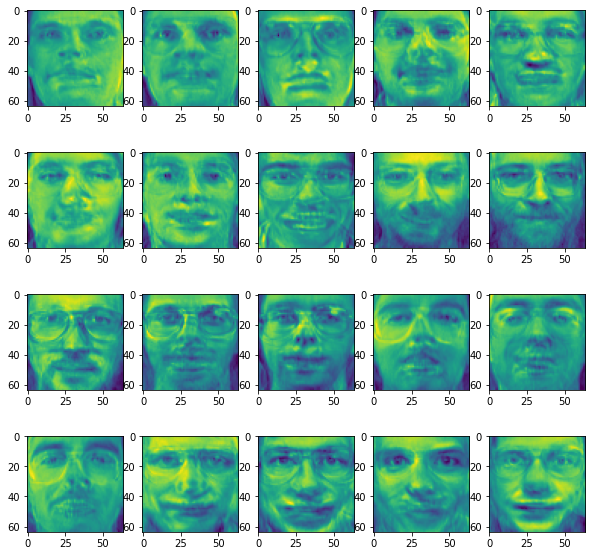

In [49]:
# 5.3
fig = plt.figure(figsize = (10,10))

# 5.3.1
for i in range(20):
    _=plt.subplot(4,5,i+1)
    _=plt.imshow(im[i].reshape(64,64))

In [ ]:
######### I am done ##########